In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None

warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

Read the new DataFrame

In [6]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("HourlyDetails (Unboosted).csv")  

In [7]:
#df = df[:90888]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299C71A8E48>]],
      dtype=object)

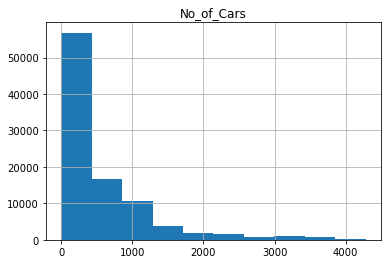

In [8]:
df.hist(column="No_of_Cars")

In [9]:
df["Congestion?"] = (df["No_of_Cars"]>3000).astype(int)

### MODEL

In [82]:
# day of week ois important
# not keep isHoliday ---- 141.49
# keep isHoliday ---- 141.08
# Hyper parameter tuning ---- 141.06
df_x = df.drop(["No_of_Cars", "Date", "Tolls", "Congestion?"],axis=1)
df_y = df["Congestion?"]

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.90, random_state=100)

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1500, random_state=100)

model = rf.fit(x_train.values, y_train.values)        # Fit the RFR mode

ypred = model.predict(x_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))
print(balanced_accuracy_score(y_test, ypred))

[[9232   19]
 [  11  178]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9251
           1       0.90      0.94      0.92       189

    accuracy                           1.00      9440
   macro avg       0.95      0.97      0.96      9440
weighted avg       1.00      1.00      1.00      9440

0.996822033898305
0.9698725548903908


In [95]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100)

model = xgb.fit(x_train, y_train)        # Fit the RFR mode

ypred = model.predict(x_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))
print(balanced_accuracy_score(y_test, ypred))

[[9210   41]
 [   2  187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9251
           1       0.82      0.99      0.90       189

    accuracy                           1.00      9440
   macro avg       0.91      0.99      0.95      9440
weighted avg       1.00      1.00      1.00      9440

0.9954449152542373
0.9924930180578219


In [102]:
test = pd.DataFrame(y_test)
pred = pd.DataFrame(ypred)
final = pd.concat([test, pred], axis=1)
test.to_csv("class_test.csv")
pred.to_csv("class_pred.csv")
# manually merge the CSVs

In [103]:
data = pd.read_csv("class_test.csv")
data = data.set_index('Index')


In [104]:
merged = pd.merge(left=df, left_index=True,
                  right=data, right_index=True,
                  how='inner')

In [105]:
merged.head()

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,Congestion?,Prediction
6,01-01-2019,6,7,38,2,0,1,-1.55,-1.68,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,0,0
22,01-01-2019,22,23,144,2,0,1,-1.55,-1.68,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,0,0
23,01-01-2019,23,0,81,2,0,1,-1.55,-1.68,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,0,0
24,01-01-2019,0,1,15,2,0,1,-1.55,-1.68,2019,N6,0,0,0,0,0,0,0,0,0,0,1,0,0
34,01-01-2019,10,11,93,2,0,1,-1.55,-1.68,2019,N6,0,0,0,0,0,0,0,0,0,0,1,0,0


In [108]:
final = merged[["Date","Tolls","StartTime","DayOfWeek","isHoliday?","Congestion?","Prediction"]]

#final["Inaccuracy"] = abs(final["No_of_Cars_y"] - final["Predicted"])
#final["Precision"] = final["Inaccuracy"]/final["No_of_Cars_y"]

#final = final.sort_values("Precision", ascending=False)

#final[(final["Precision"]>1) & (final["No_of_Cars_y"]>10)]

In [110]:
final[final["Congestion?"] != final["Prediction"]]

,Date,Tolls,StartTime,DayOfWeek,isHoliday?,Congestion?,Prediction
344,02-01-2019,M50,8,3,0,0,1
15661,25-02-2019,M50,13,1,0,0,1
25140,01-04-2019,M50,12,1,0,1,0
25883,04-04-2019,M50,11,4,0,0,1
28955,17-04-2019,M50,11,3,0,0,1
28961,17-04-2019,M50,17,3,0,0,1
29458,19-04-2019,M50,10,5,0,0,1
29459,19-04-2019,M50,11,5,0,0,1
33972,07-05-2019,M50,12,2,0,0,1
34619,09-05-2019,M50,11,4,0,0,1


In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import time
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.testing import all_estimators
from sklearn.base import RegressorMixin
from sklearn.base import ClassifierMixin
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, r2_score, mean_squared_error
import warnings
import xgboost
# import catboost
import lightgbm

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

CLASSIFIERS = [est for est in all_estimators(
) if issubclass(est[1], ClassifierMixin)]

removed_classifiers = [('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('GradientBoostingClassifier',
  sklearn.ensemble.gradient_boosting.GradientBoostingClassifier),
 ('GaussianProcessClassifier',sklearn.gaussian_process.gpc.GaussianProcessClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier),
 ('MLPClassifier', sklearn.neural_network.multilayer_perceptron.MLPClassifier),
 ('LogisticRegressionCV', sklearn.linear_model.logistic.LogisticRegressionCV),
 ('MultiOutputClassifier', sklearn.multioutput.MultiOutputClassifier),
 ('MultinomialNB', sklearn.naive_bayes.MultinomialNB),
 ('OneVsOneClassifier', sklearn.multiclass.OneVsOneClassifier),
 ('OneVsRestClassifier', sklearn.multiclass.OneVsRestClassifier),
 ('OutputCodeClassifier', sklearn.multiclass.OutputCodeClassifier),
 ('RadiusNeighborsClassifier',
  sklearn.neighbors.classification.RadiusNeighborsClassifier),
 ('VotingClassifier', sklearn.ensemble.voting.VotingClassifier),
 ('NuSVC', sklearn.svm._classes.NuSVC),
]
for i in removed_classifiers:
    CLASSIFIERS.pop(CLASSIFIERS.index(i))

CLASSIFIERS.append(('XGBClassifier',xgboost.XGBClassifier))
CLASSIFIERS.append(('LGBMClassifier',lightgbm.LGBMClassifier))
# CLASSIFIERS.append(('CatBoostClassifier',catboost.CatBoostClassifier))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer_low = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

categorical_transformer_high = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    # 'OrdianlEncoder' Raise a ValueError when encounters an unknown value. Check https://github.com/scikit-learn/scikit-learn/pull/13423
    ('encoding', OrdinalEncoder())
])


# Helper function

def get_card_split(df, cols, n=11):
    cond = df[cols].nunique() > n
    card_high = cols[cond]
    card_low  = cols[~cond]
    return card_low, card_high


# Helper class for performing classification

class LazyClassifier:
    def __init__(self, verbose=0, ignore_warnings=True, custom_metric = None, predictions = False,random_state=42):
        self.verbose = verbose
        self.ignore_warnings = ignore_warnings
        self.custom_metric = custom_metric
        self.predictions = predictions
        self.random_state =random_state

    def fit(self, X_train, X_test, y_train, y_test):
        Accuracy = []
        B_Accuracy = []
        ROC_AUC = []
        F1 = []
        names = []
        TIME = []
        predictions = {}
        
        if self.custom_metric != None:
            CUSTOM_METRIC = []
            
        if type(X_train) is np.ndarray:
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

        numeric_features = X_train.select_dtypes(
            include=['int64', 'float64', 'int32', 'float32']).columns
        categorical_features = X_train.select_dtypes(
            include=['object']).columns
        
        categorical_low, categorical_high = get_card_split(X_train, categorical_features)

        preprocessor = ColumnTransformer(
            transformers=[
                ('numeric', numeric_transformer, numeric_features),
                ('categorical_low', categorical_transformer_low, categorical_low),
                ('categorical_high', categorical_transformer_high, categorical_high)
            ])

        for name, model in tqdm(CLASSIFIERS):
            start = time.time()
            try:
                if 'random_state' in model().get_params().keys():
                    pipe = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', model(random_state = self.random_state))
                    ])
                else:
                    pipe = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', model())
                    ])

                pipe.fit(X_train, y_train)
                y_pred = pipe.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred, normalize=True)
                b_accuracy = balanced_accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred, average='weighted')
                try:
                    roc_auc = roc_auc_score(y_test, y_pred)
                except Exception as exception:
                    roc_auc = None
                    if self.ignore_warnings == False:
                        print("ROC AUC couldn't be calculated for "+name)
                        print(exception)
                names.append(name)
                Accuracy.append(accuracy)
                B_Accuracy.append(b_accuracy)
                ROC_AUC.append(roc_auc)
                F1.append(f1)
                TIME.append(time.time() - start)
                if self.custom_metric != None:
                    custom_metric = self.custom_metric(y_test, y_pred)
                    CUSTOM_METRIC.append(custom_metric)
                if self.verbose > 0:
                    if self.custom_metric != None:
                        print({"Model": name,
                               "Accuracy": accuracy,
                               "Balanced Accuracy": b_accuracy,
                               "ROC AUC": roc_auc,
                               "F1 Score": f1,
                               self.custom_metric.__name__: custom_metric,
                              "Time taken": time.time() - start})
                    else:
                        print({"Model": name,
                               "Accuracy": accuracy,
                               "Balanced Accuracy": b_accuracy,
                               "ROC AUC": roc_auc,
                               "F1 Score": f1,
                              "Time taken": time.time() - start})
                if self.predictions == True:
                    predictions[name]=y_pred
            except Exception as exception:
                if self.ignore_warnings == False:
                    print(name + " model failed to execute")
                    print(exception)
        if self.custom_metric == None:
            scores = pd.DataFrame({"Model": names,
                                   "Accuracy": Accuracy,
                                   "Balanced Accuracy": B_Accuracy,
                                   "ROC AUC": ROC_AUC,
                                   "F1 Score": F1,
                                   "Time Taken": TIME})
        else:
            scores = pd.DataFrame({"Model": names,
                                   "Accuracy": Accuracy,
                                   "Balanced Accuracy": B_Accuracy,
                                   "ROC AUC": ROC_AUC,
                                   "F1 Score": F1,
                                  self.custom_metric.__name__: CUSTOM_METRIC,
                                  "Time Taken": TIME})
        scores = scores.sort_values(
            by='Balanced Accuracy', ascending=False).set_index('Model')

        if self.predictions == True:
            predictions_df = pd.DataFrame.from_dict(predictions)
        return scores, predictions_df if self.predictions == True else scores

# Helper class for performing classification

Classification = LazyClassifier

In [73]:
CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('CheckingClassifier', sklearn.utils._mocking.CheckingClassifier),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  

In [74]:
from sklearn.utils import shuffle
X, y = shuffle(df_x, df_y, random_state=100)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyClassifier(verbose=2,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

  3%|█████▊                                                                                                                                                                        | 1/30 [00:01<00:53,  1.86s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9937496689443297, 'Balanced Accuracy': 0.9608432663604335, 'ROC AUC': 0.9608432663604335, 'F1 Score': 0.9939061807231303, 'Time taken': 1.8591351509094238}


 10%|█████████████████▍                                                                                                                                                            | 3/30 [00:02<00:27,  1.02s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9959743630488903, 'Balanced Accuracy': 0.9566961985928601, 'ROC AUC': 0.9566961985928601, 'F1 Score': 0.9959700966360178, 'Time taken': 0.3390932083129883}
{'Model': 'BernoulliNB', 'Accuracy': 0.963928174161767, 'Balanced Accuracy': 0.8873994811733971, 'ROC AUC': 0.887399481173397, 'F1 Score': 0.9700448428716162, 'Time taken': 0.13463973999023438}


 13%|███████████████████████▏                                                                                                                                                      | 4/30 [00:06<00:49,  1.91s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.966788495153345, 'Balanced Accuracy': 0.5674002302284218, 'ROC AUC': 0.5674002302284218, 'F1 Score': 0.9633994260744936, 'Time taken': 3.992898941040039}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'CheckingClassifier', 'Accuracy': 0.9755813337570846, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9635229109653851, 'Time taken': 0.1047205924987793}

 23%|████████████████████████████████████████▌                                                                                                                                     | 7/30 [00:06<00:22,  1.01it/s]


{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.995338736161873, 'Balanced Accuracy': 0.9500257222668855, 'ROC AUC': 0.9500257222668855, 'F1 Score': 0.9953337961048625, 'Time taken': 0.11572742462158203}


 30%|████████████████████████████████████████████████████▏                                                                                                                         | 9/30 [00:06<00:15,  1.38it/s]

{'Model': 'DummyClassifier', 'Accuracy': 0.9540759574129986, 'Balanced Accuracy': 0.4974377842669708, 'ROC AUC': 0.4974377842669707, 'F1 Score': 0.9530860650584929, 'Time taken': 0.0867314338684082}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9923724773557921, 'Balanced Accuracy': 0.9146670273751345, 'ROC AUC': 0.9146670273751345, 'F1 Score': 0.9923316948518033, 'Time taken': 0.11273550987243652}


 37%|███████████████████████████████████████████████████████████████▍                                                                                                             | 11/30 [00:08<00:12,  1.48it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.995815456327136, 'Balanced Accuracy': 0.9745914293500958, 'ROC AUC': 0.9745914293500958, 'F1 Score': 0.9958899863173817, 'Time taken': 1.356372594833374}
{'Model': 'GaussianNB', 'Accuracy': 0.9593198792308915, 'Balanced Accuracy': 0.9780933793664549, 'ROC AUC': 0.9780933793664549, 'F1 Score': 0.9681180737369102, 'Time taken': 0.1167001724243164}


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 14/30 [00:49<02:22,  8.91s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9930610731500609, 'Balanced Accuracy': 0.942513677909637, 'ROC AUC': 0.9425136779096371, 'F1 Score': 0.9931641381512236, 'Time taken': 40.7635760307312}
LabelPropagation model failed to execute
Unable to allocate 21.2 GiB for an array with shape (75513, 75513) and data type float32
LabelSpreading model failed to execute
Unable to allocate 21.2 GiB for an array with shape (75513, 75513) and data type float32


 50%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 15/30 [00:49<01:35,  6.34s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9315112029238837, 'Balanced Accuracy': 0.9638410175464962, 'ROC AUC': 0.9638410175464962, 'F1 Score': 0.9502446296375258, 'Time taken': 0.321030855178833}


 53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 16/30 [00:50<01:08,  4.87s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9736744530960326, 'Balanced Accuracy': 0.49902269518948855, 'ROC AUC': 0.49902269518948855, 'F1 Score': 0.9625686952643636, 'Time taken': 1.4350247383117676}


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 18/30 [00:51<00:30,  2.53s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9733036707452726, 'Balanced Accuracy': 0.4988326636985558, 'ROC AUC': 0.4988326636985558, 'F1 Score': 0.9623829391628513, 'Time taken': 0.47010374069213867}
{'Model': 'NearestCentroid', 'Accuracy': 0.9305577625933577, 'Balanced Accuracy': 0.9633523651412405, 'ROC AUC': 0.9633523651412403, 'F1 Score': 0.9496504610143253, 'Time taken': 0.13980507850646973}


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 20/30 [00:51<00:13,  1.32s/it]

NuSVC model failed to execute
specified nu is infeasible
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9755813337570846, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9635229109653851, 'Time taken': 0.19723749160766602}


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 21/30 [00:52<00:08,  1.01it/s]

{'Model': 'Perceptron', 'Accuracy': 0.9729328883945124, 'Balanced Accuracy': 0.5684344208214684, 'ROC AUC': 0.5684344208214684, 'F1 Score': 0.9671623642479323, 'Time taken': 0.23238563537597656}


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 22/30 [00:52<00:06,  1.31it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.02441866624291541, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.0011641163534626686, 'Time taken': 0.22142601013183594}


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 24/30 [00:54<00:04,  1.29it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9963451453996504, 'Balanced Accuracy': 0.9759203542512053, 'ROC AUC': 0.9759203542512053, 'F1 Score': 0.9963957970880555, 'Time taken': 1.7173922061920166}
{'Model': 'RidgeClassifier', 'Accuracy': 0.9755813337570846, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9635229109653851, 'Time taken': 0.14069581031799316}


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 25/30 [00:54<00:03,  1.56it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9755813337570846, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9635229109653851, 'Time taken': 0.3158142566680908}


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 26/30 [00:54<00:02,  1.86it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.9755813337570846, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9635229109653851, 'Time taken': 0.2982494831085205}


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 27/30 [01:02<00:08,  2.70s/it]

{'Model': 'SVC', 'Accuracy': 0.9936437311298268, 'Balanced Accuracy': 0.9755932904456147, 'ROC AUC': 0.9755932904456146, 'F1 Score': 0.9938905571395595, 'Time taken': 7.7606751918792725}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 29/30 [01:07<00:02,  2.59s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9939615445733354, 'Balanced Accuracy': 0.9916179447202103, 'ROC AUC': 0.9916179447202103, 'F1 Score': 0.9942590387525575, 'Time taken': 4.6732776165008545}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:08<00:00,  2.27s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9965570210286562, 'Balanced Accuracy': 0.9739140409893274, 'ROC AUC': 0.9739140409893273, 'F1 Score': 0.9965908917128738, 'Time taken': 0.8337347507476807}


In [75]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.99,0.99,0.99,0.99,4.67
GaussianNB,0.96,0.98,0.98,0.97,0.12
RandomForestClassifier,1.00,0.98,0.98,1.00,1.72
SVC,0.99,0.98,0.98,0.99,7.76
ExtraTreesClassifier,1.00,0.97,0.97,1.00,1.36
LGBMClassifier,1.00,0.97,0.97,1.00,0.83
LinearDiscriminantAnalysis,0.93,0.96,0.96,0.95,0.32
NearestCentroid,0.93,0.96,0.96,0.95,0.14
AdaBoostClassifier,0.99,0.96,0.96,0.99,1.86


### Classify experiment

In [38]:
'''
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("HourlyDetails (Unboosted).csv") 
df["Congestion?"] = (df["No_of_Cars"]>3000).astype(int)

from sklearn.model_selection import train_test_split
final_train_x, final_test_x, final_train_y, final_test_y = train_test_split(df, df, train_size=0.75, random_state=100)
'''

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,Congestion?
58023,09-08-2019,15,16,1762,5,0,0,0.46,-0.77,2019,M3,0,0,0,0,1,0,0,0,0,0,0,0
36358,16-05-2019,22,23,0,4,0,0,-0.41,0.03,2019,N6,0,0,0,0,0,0,0,0,0,0,1,0
41288,04-06-2019,8,9,572,2,0,0,-0.12,-1.33,2019,N25,0,0,0,0,0,0,0,0,0,1,0,0
57778,08-08-2019,10,11,583,4,0,0,0.46,-0.88,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0,0
46656,25-06-2019,0,1,14,2,0,0,-0.12,1.05,2019,N25,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
#x_train.to_csv("boost_classifier_data.csv", index=False)

In [28]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("boost_classifier_data.csv") 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CE8CA6308>]],
      dtype=object)

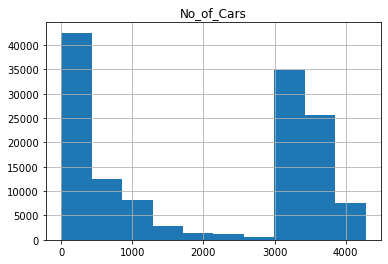

In [30]:
df.hist(column="No_of_Cars")

In [39]:
final_x = final_test_x.drop(["No_of_Cars", "Date", "Tolls", "Congestion?"],axis=1)
final_y = final_test_x["Congestion?"]

In [32]:
df_x = df.drop(["No_of_Cars", "Date", "Tolls", "Congestion?"],axis=1)
df_y = df["Congestion?"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.75, random_state=100)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1500, random_state=100)

model_rf = rf.fit(x_train.values, y_train.values)        # Fit the RFR mode

ypred = model_rf.predict(x_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))
print(balanced_accuracy_score(y_test, ypred))

'''
[[17111    74]
 [    0 17079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17185
           1       1.00      1.00      1.00     17079

    accuracy                           1.00     34264
   macro avg       1.00      1.00      1.00     34264
weighted avg       1.00      1.00      1.00     34264

0.997840298855942
0.9978469595577539'''

[[17111    74]
 [    0 17079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17185
           1       1.00      1.00      1.00     17079

    accuracy                           1.00     34264
   macro avg       1.00      1.00      1.00     34264
weighted avg       1.00      1.00      1.00     34264

0.997840298855942
0.9978469595577539


'\n[[17111    74]\n [    0 17079]]\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     17185\n           1       1.00      1.00      1.00     17079\n\n    accuracy                           1.00     34264\n   macro avg       1.00      1.00      1.00     34264\nweighted avg       1.00      1.00      1.00     34264\n\n0.997840298855942\n0.9978469595577539'

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100)

model_xgb = xgb.fit(x_train, y_train)        # Fit the RFR mode

ypred = model_xgb.predict(x_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))
print(balanced_accuracy_score(y_test, ypred))


'''
[[17048   137]
 [   10 17069]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17185
           1       0.99      1.00      1.00     17079

    accuracy                           1.00     34264
   macro avg       1.00      1.00      1.00     34264
weighted avg       1.00      1.00      1.00     34264

0.9957097828624796
0.9957212084805445
'''

[[17048   137]
 [   10 17069]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17185
           1       0.99      1.00      1.00     17079

    accuracy                           1.00     34264
   macro avg       1.00      1.00      1.00     34264
weighted avg       1.00      1.00      1.00     34264

0.9957097828624796
0.9957212084805445


'\n[[17048   137]\n [   10 17069]]\n              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00     17185\n           1       0.99      1.00      1.00     17079\n\n    accuracy                           1.00     34264\n   macro avg       1.00      1.00      1.00     34264\nweighted avg       1.00      1.00      1.00     34264\n\n0.9957097828624796\n0.9957212084805445\n'

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=100)

model_dt = dt.fit(x_train.values, y_train.values)        # Fit the RFR mode

ypred = model_dt.predict(x_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))
print(balanced_accuracy_score(y_test, ypred))

[[17133    52]
 [    0 17079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17185
           1       1.00      1.00      1.00     17079

    accuracy                           1.00     34264
   macro avg       1.00      1.00      1.00     34264
weighted avg       1.00      1.00      1.00     34264

0.9984823721690403
0.9984870526622054


In [10]:
from sklearn.utils import shuffle
X, y = shuffle(df_x, df_y, random_state=100)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyClassifier(verbose=2,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

  3%|██████                                                                                                                                                                        | 1/29 [00:02<01:10,  2.52s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9955127503556966, 'Balanced Accuracy': 0.9955692630162964, 'ROC AUC': 0.9955692630162964, 'F1 Score': 0.9955129630094056, 'Time taken': 2.517545461654663}


  7%|████████████                                                                                                                                                                  | 2/29 [00:03<00:55,  2.06s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9986866586406917, 'Balanced Accuracy': 0.9987096774193549, 'ROC AUC': 0.9987096774193549, 'F1 Score': 0.9986866871539727, 'Time taken': 0.9923417568206787}
{'Model': 'BernoulliNB', 'Accuracy': 0.9788041297289409, 'Balanced Accuracy': 0.9791600026520262, 'ROC AUC': 0.9791600026520261, 'F1 Score': 0.9788030612443238, 'Time taken': 0.19447898864746094}

 10%|██████████████████                                                                                                                                                            | 3/29 [00:03<00:39,  1.50s/it]

 17%|██████████████████████████████                                                                                                                                                | 5/29 [00:43<03:36,  9.02s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9800445076793988, 'Balanced Accuracy': 0.9803786406448578, 'ROC AUC': 0.9803786406448577, 'F1 Score': 0.9800440354054809, 'Time taken': 39.27702450752258}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|████████████████████████████████████                                                                                                                                          | 6/29 [00:43<02:26,  6.36s/it]

{'Model': 'CheckingClassifier', 'Accuracy': 0.5089197767319689, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.343291065758128, 'Time taken': 0.1466069221496582}


 28%|████████████████████████████████████████████████                                                                                                                              | 8/29 [00:43<01:07,  3.21s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9988325854583926, 'Balanced Accuracy': 0.9988530465949821, 'ROC AUC': 0.9988530465949821, 'F1 Score': 0.9988326081864466, 'Time taken': 0.23836469650268555}
{'Model': 'DummyClassifier', 'Accuracy': 0.49578636313888585, 'Balanced Accuracy': 0.49575800420649696, 'ROC AUC': 0.495758004206497, 'F1 Score': 0.49582532809402013, 'Time taken': 0.1346733570098877}


 31%|██████████████████████████████████████████████████████                                                                                                                        | 9/29 [00:43<00:45,  2.30s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9980664696654628, 'Balanced Accuracy': 0.9981003584229391, 'ROC AUC': 0.9981003584229391, 'F1 Score': 0.9980665291458082, 'Time taken': 0.16755080223083496}


 38%|█████████████████████████████████████████████████████████████████▌                                                                                                           | 11/29 [00:47<00:34,  1.93s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9985042501185656, 'Balanced Accuracy': 0.9985304659498209, 'ROC AUC': 0.9985304659498209, 'F1 Score': 0.9985042866937995, 'Time taken': 3.527630567550659}
{'Model': 'GaussianNB', 'Accuracy': 0.9788041297289409, 'Balanced Accuracy': 0.9791600026520262, 'ROC AUC': 0.9791600026520261, 'F1 Score': 0.9788030612443238, 'Time taken': 0.20245695114135742}


 48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 14/29 [02:21<05:08, 20.59s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9940534821786874, 'Balanced Accuracy': 0.99415770609319, 'ROC AUC': 0.99415770609319, 'F1 Score': 0.994053902788696, 'Time taken': 93.41632127761841}
LabelPropagation model failed to execute
Unable to allocate 44.8 GiB for an array with shape (109644, 109644) and data type float32
LabelSpreading model failed to execute
Unable to allocate 44.8 GiB for an array with shape (109644, 109644) and data type float32


 52%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 15/29 [02:21<03:23, 14.55s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9641384845499982, 'Balanced Accuracy': 0.9647514005014886, 'ROC AUC': 0.9647514005014886, 'F1 Score': 0.9641169655024587, 'Time taken': 0.4637613296508789}


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 16/29 [02:32<02:56, 13.55s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9800445076793988, 'Balanced Accuracy': 0.9803786406448578, 'ROC AUC': 0.9803786406448577, 'F1 Score': 0.9800440354054809, 'Time taken': 11.21751618385315}


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 17/29 [02:33<01:56,  9.67s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9800445076793988, 'Balanced Accuracy': 0.9803786406448578, 'ROC AUC': 0.9803786406448577, 'F1 Score': 0.9800440354054809, 'Time taken': 0.6173384189605713}


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 18/29 [02:33<01:15,  6.83s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.9703038925978622, 'Balanced Accuracy': 0.9708087481717395, 'ROC AUC': 0.9708087481717395, 'F1 Score': 0.9702944932932543, 'Time taken': 0.19547820091247559}


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 19/29 [02:33<00:48,  4.87s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.980555251541352, 'Balanced Accuracy': 0.9808804327595531, 'ROC AUC': 0.9808804327595532, 'F1 Score': 0.9805549880899104, 'Time taken': 0.30019688606262207}


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 20/29 [02:34<00:31,  3.49s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9800445076793988, 'Balanced Accuracy': 0.9803786406448578, 'ROC AUC': 0.9803786406448577, 'F1 Score': 0.9800440354054809, 'Time taken': 0.2622992992401123}


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 21/29 [02:34<00:20,  2.52s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.4910802232680311, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3234699004409359, 'Time taken': 0.2652924060821533}


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 23/29 [02:38<00:12,  2.16s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9982488781875889, 'Balanced Accuracy': 0.9982795698924731, 'ROC AUC': 0.9982795698924731, 'F1 Score': 0.9982489275343726, 'Time taken': 4.127961158752441}
{'Model': 'RidgeClassifier', 'Accuracy': 0.9641384845499982, 'Balanced Accuracy': 0.9647514005014886, 'ROC AUC': 0.9647514005014886, 'F1 Score': 0.9641169655024587, 'Time taken': 0.1934812068939209}


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 24/29 [02:39<00:08,  1.66s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9641384845499982, 'Balanced Accuracy': 0.9647514005014886, 'ROC AUC': 0.9647514005014886, 'F1 Score': 0.9641169655024587, 'Time taken': 0.4827103614807129}


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 25/29 [02:39<00:05,  1.27s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9800445076793988, 'Balanced Accuracy': 0.9803786406448578, 'ROC AUC': 0.9803786406448577, 'F1 Score': 0.9800440354054809, 'Time taken': 0.356046199798584}


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 26/29 [03:06<00:26,  8.93s/it]

{'Model': 'SVC', 'Accuracy': 0.9936886651344351, 'Balanced Accuracy': 0.9937836585660047, 'ROC AUC': 0.9937836585660047, 'F1 Score': 0.9936890907362512, 'Time taken': 26.82513666152954}
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 28/29 [03:13<00:07,  7.36s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9955127503556966, 'Balanced Accuracy': 0.9955757732613453, 'ROC AUC': 0.9955757732613453, 'F1 Score': 0.9955129809869707, 'Time taken': 7.346553802490234}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [03:15<00:00,  6.74s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.99762868921236, 'Balanced Accuracy': 0.9976702508960573, 'ROC AUC': 0.9976702508960573, 'F1 Score': 0.9976287762128815, 'Time taken': 1.6487903594970703}


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.24
BaggingClassifier,1.00,1.00,1.00,1.00,0.99
ExtraTreesClassifier,1.00,1.00,1.00,1.00,3.53
RandomForestClassifier,1.00,1.00,1.00,1.00,4.13
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.17
LGBMClassifier,1.00,1.00,1.00,1.00,1.65
XGBClassifier,1.00,1.00,1.00,1.00,7.35
AdaBoostClassifier,1.00,1.00,1.00,1.00,2.52
KNeighborsClassifier,0.99,0.99,0.99,0.99,93.42


In [47]:
print ("-----Random Forest--------")
ypred = model_rf.predict(final_x)

print(confusion_matrix(final_y,ypred))
print(classification_report(final_y,ypred))
print(accuracy_score(final_y, ypred))
print(balanced_accuracy_score(final_y, ypred))

print ("-----Decision Tree--------")
ypred = model_dt.predict(final_x)

print(confusion_matrix(final_y,ypred))
print(classification_report(final_y,ypred))
print(accuracy_score(final_y, ypred))
print(balanced_accuracy_score(final_y, ypred))

print ("-----XGB--------")
ypred = model_xgb.predict(final_x)

print(confusion_matrix(final_y,ypred))
print(classification_report(final_y,ypred))
print(accuracy_score(final_y, ypred))
print(balanced_accuracy_score(final_y, ypred))

-----Random Forest--------
[[22979    77]
 [   11   531]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23056
           1       0.87      0.98      0.92       542

    accuracy                           1.00     23598
   macro avg       0.94      0.99      0.96     23598
weighted avg       1.00      1.00      1.00     23598

0.9962708704127469
0.9881825511957409
-----Decision Tree--------
[[22997    59]
 [   58   484]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23056
           1       0.89      0.89      0.89       542

    accuracy                           1.00     23598
   macro avg       0.94      0.95      0.94     23598
weighted avg       1.00      1.00      1.00     23598

0.9950419527078566
0.9452149715372935
-----XGB--------
[[22887   169]
 [    0   542]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     230